In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
rain = pd.read_table("nashville_precip.txt", delimiter='\s+', na_values='NA', index_col=0)

In [10]:
rain

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1871,2.76,4.58,5.01,4.13,3.30,2.98,1.58,2.36,0.95,1.31,2.13,1.65
1872,2.32,2.11,3.14,5.91,3.09,5.17,6.10,1.65,4.50,1.58,2.25,2.38
1873,2.96,7.14,4.11,3.59,6.31,4.20,4.63,2.36,1.81,4.28,4.36,5.94
1874,5.22,9.23,5.36,11.84,1.49,2.87,2.65,3.52,3.12,2.63,6.12,4.19
1875,6.15,3.06,8.14,4.22,1.73,5.63,8.12,1.60,3.79,1.25,5.46,4.30
...,...,...,...,...,...,...,...,...,...,...,...,...
2007,3.32,1.84,2.26,2.75,3.30,2.37,1.47,1.38,1.99,4.95,6.20,3.83
2008,4.76,2.53,5.56,7.20,5.54,2.21,4.32,1.67,0.88,5.03,1.75,6.72
2009,4.59,2.85,2.92,4.13,8.45,4.53,6.03,2.14,11.08,6.49,0.67,3.99


First determine x and y values. x values can be the year and y can be a certain month in the table we want to plot

In [11]:
x = rain.index.values
y = rain["Jan"].values

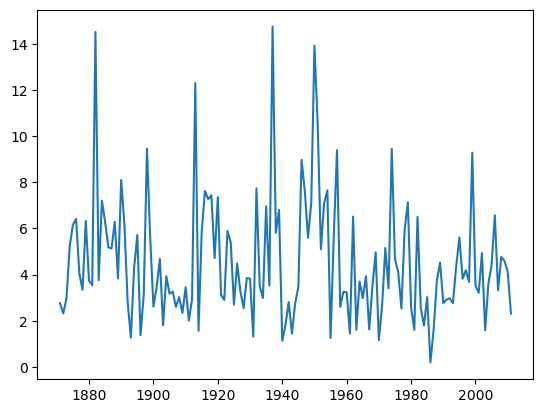

In [13]:
plt.figure()
plt.plot(x, y)

next is what we can do to add some labels

Text(0.5, 1.0, 'January rainfall in Nashville')

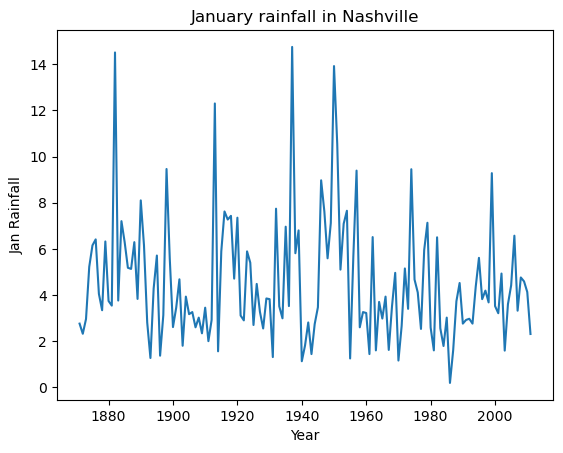

In [14]:
plt.figure()
plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Jan Rainfall')
plt.title('January rainfall in Nashville')

Query and plot the rainfall in jan between 2007 - 2011

Text(0.5, 1.0, 'January rainfall in Nashville from 2007 - 2011')

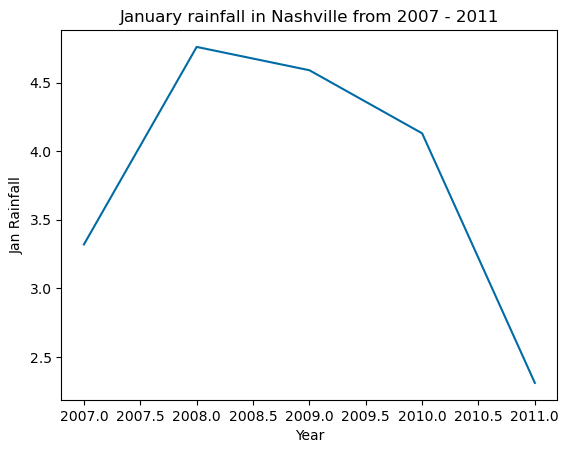

In [23]:
plt.figure()

x = [2007, 2008, 2009, 2010, 2011]
y = rain.loc[2007:2012, "Jan"].values
plt.plot(x,y)

plt.xlabel('Year')
plt.ylabel('Jan Rainfall')
plt.title('January rainfall in Nashville from 2007 - 2011')

### Displaying data labels
Need to create a loop

Text(0.5, 1.0, 'January rainfall in Nashville from 2007 - 2011')

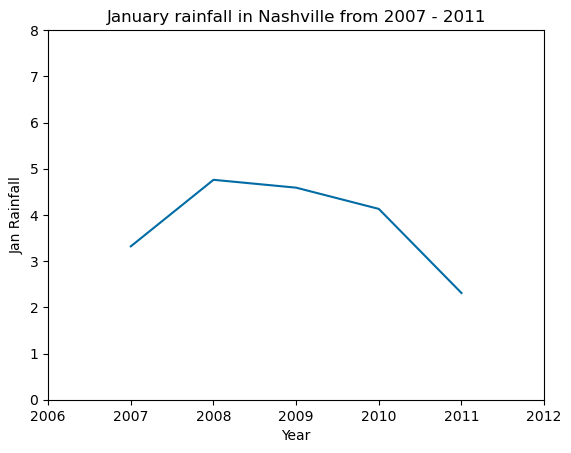

In [22]:
plt.figure()

x = [2007, 2008, 2009, 2010, 2011]
y = rain.loc[2007:2012, "Jan"].values
plt.plot(x,y)

plt.xlim(left=2006,right=2012)
plt.ylim(bottom=0,top=8)

plt.xlabel('Year')
plt.ylabel('Jan Rainfall')
plt.title('January rainfall in Nashville from 2007 - 2011')

Text(0.5, 1.0, 'January rainfall in Nashville from 2007 - 2011')

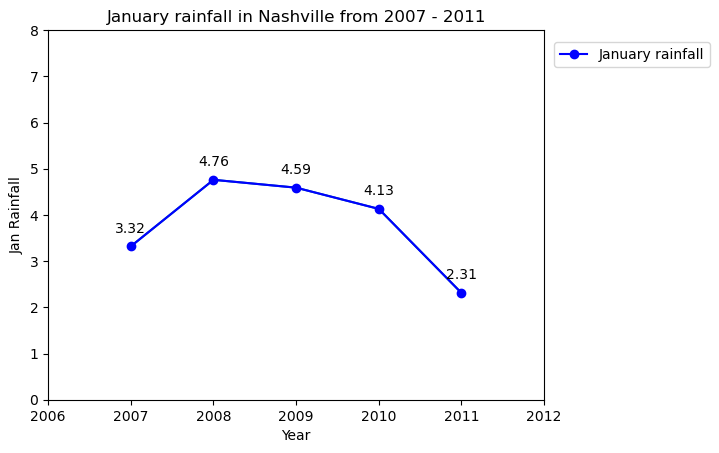

In [42]:
plt.figure()

x = [2007, 2008, 2009, 2010, 2011]
y = rain.loc[2007:2012, "Jan"].values
plt.plot(x,y)

plt.xlim(left=2006,right=2012)
plt.ylim(bottom=0,top=8)

for a, b in zip(x, y):
    label = b
    plt.annotate(label,
                 (a,b),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center'
                 )
                

    
plt.plot(x,y, "b-o", label = 'January rainfall')

plt.legend(loc=(1.02,0.9))

plt.xlabel('Year')
plt.ylabel('Jan Rainfall')
plt.title('January rainfall in Nashville from 2007 - 2011')

### Creating 2 graphs

Use subplots

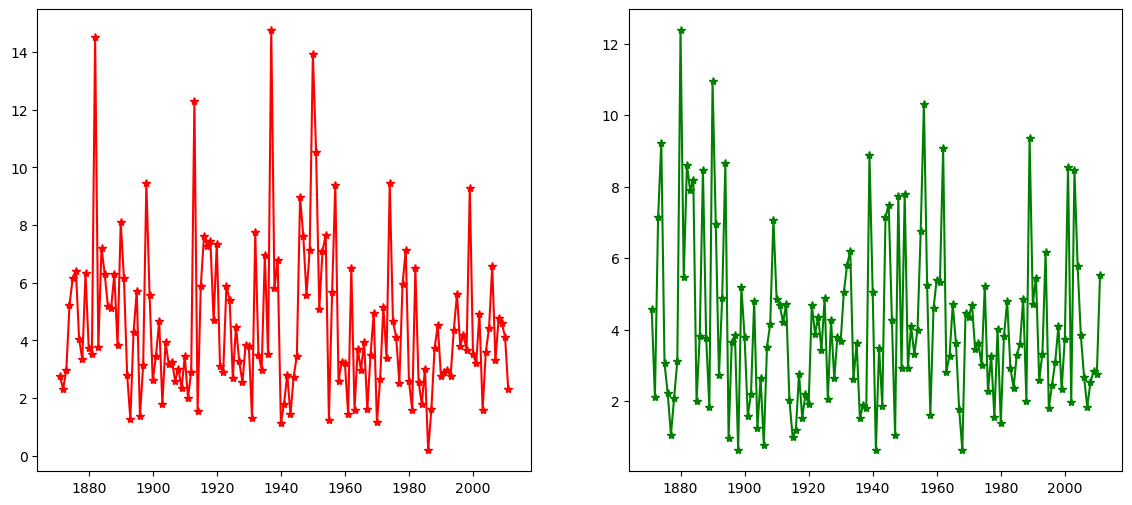

In [47]:
x = rain.index.values
y = rain['Jan'].values

plt.figure(figsize=(14,6))

plt.subplot(1,2,1) #this is for the first graph. 1 (1 row),2 (2 columns),1 (1st graph)
plt.plot(x, y, 'r*-') #plots jan values
plt.subplot(1,2,2) #this is for the second graph. 1 (1 row),2 (2 columns),2 (2nd graph)
plt.plot(x, rain['Feb'], 'g*-') #plot feb values

### Objected oriented API

So that we have more control over the graph axes we can plot

Text(0.5, 1.0, 'January rainfall in Nashville')

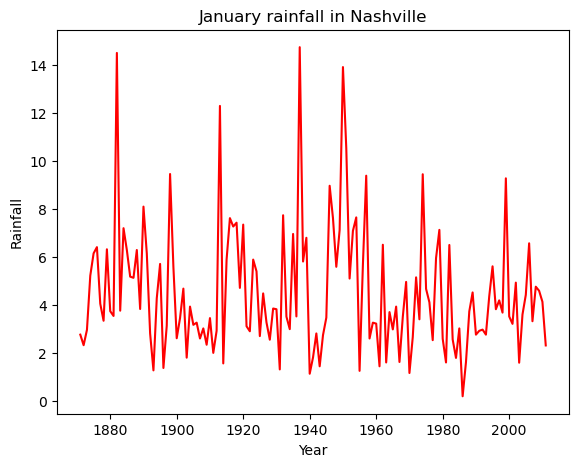

In [60]:
x = rain.index.values
y = rain['Jan'].values

fig = plt.figure()

axes = fig.add_axes( [0.1, 0.1, 0.8, 0.8] ) # left, bottom, width, height (range 0 to 1)

axes.plot(x,y, "r-")

axes.set_xlabel("Year")
axes.set_ylabel("Rainfall")
axes.set_title("January rainfall in Nashville")

Create a log graphy of the rainfall that is within the current graph

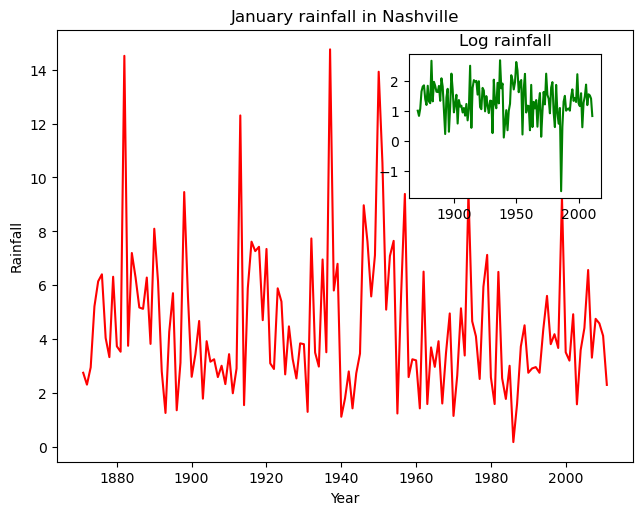

In [61]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.9, 0.9]) # main axes
axes2 = fig.add_axes([0.65, 0.65, 0.3, 0.3]) # insert axes

# main graph
axes1.plot(x, y, 'r')
axes1.set_xlabel('Year')
axes1.set_ylabel('Rainfall')
axes1.set_title('January rainfall in Nashville');

# insert
axes2.plot(x, np.log(y), 'g')
axes2.set_title('Log rainfall');

# taking the log is useful coz the amount of rainfall is often distributed unevenly across time, with long periods of low rainfall punctuated by short periods of heavy rainfall. 
# it can be easier to see patterns in the distribution of rainfall over time.
# useful technique for visualizing and analyzing data with a large range of values


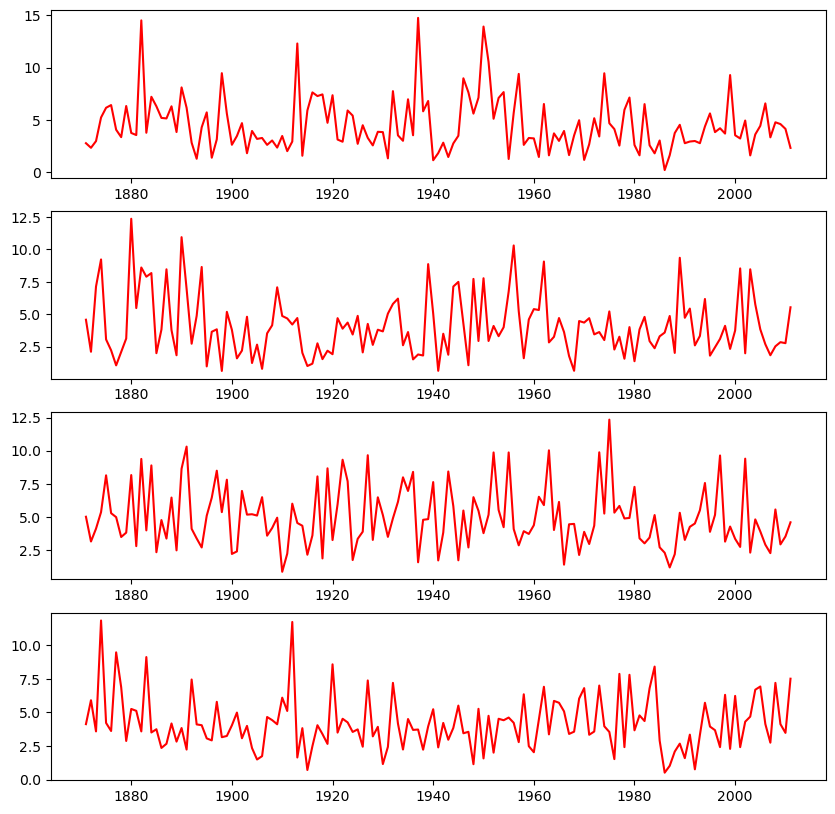

In [63]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,10)) #setting up the 4 plots

months = rain.columns

for i, ax in enumerate(axes): #loops over indices and objects
    ax.plot(x, rain[months[i]], 'r') #y here takes the months in i

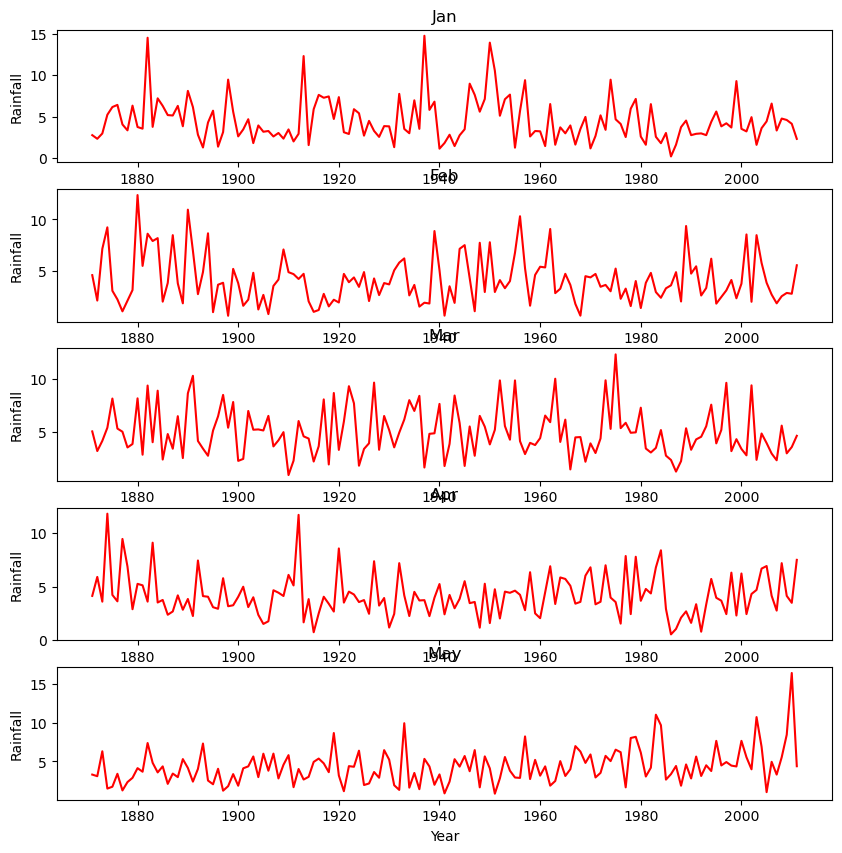

In [65]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10,10)) #setting up 5 plots

months = rain.columns

for i, ax in enumerate(axes): #loops over indices and objects
    ax.plot(x, rain[months[i]], 'r') #y here takes the months in i
    ax.set_xlabel('Year')
    ax.set_ylabel('Rainfall')
    ax.set_title(months[i])

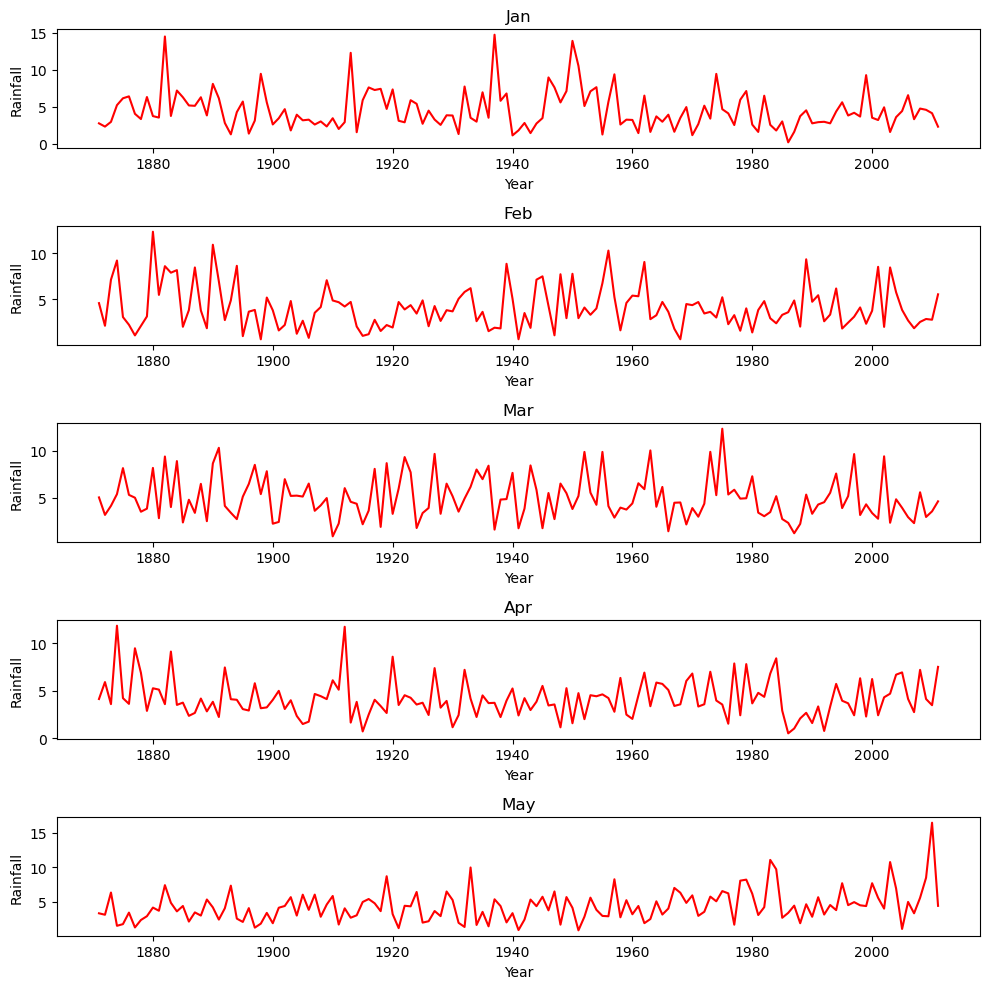

In [66]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10,10)) #setting up 5 plots

months = rain.columns

for i, ax in enumerate(axes): #loops over indices and objects
    ax.plot(x, rain[months[i]], 'r') #y here takes the months in i
    ax.set_xlabel('Year')
    ax.set_ylabel('Rainfall')
    ax.set_title(months[i])
    
fig.tight_layout() #use this because the tables had overlapping texts

Text(0, 0.5, 'Rainfall')

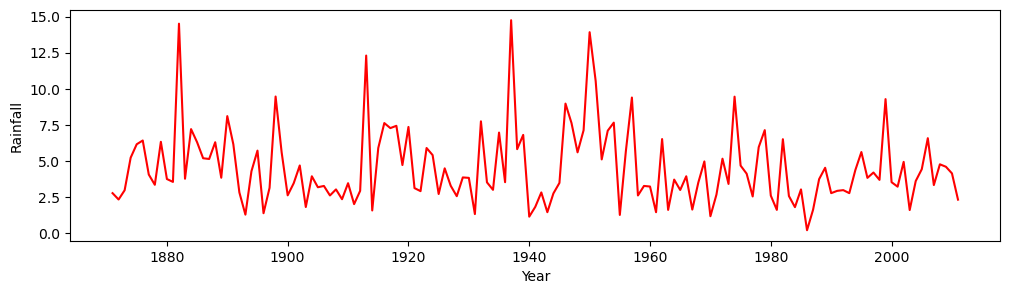

In [81]:
fig, axes = plt.subplots(figsize=(12,3)) #creating a figure size


axes.plot(x, y, 'r')
axes.set_xlabel('Year')
axes.set_ylabel('Rainfall')

Creating overlapping graphs to show comparison of rainfalls in different months

Text(0, 0.5, 'Rainfall')

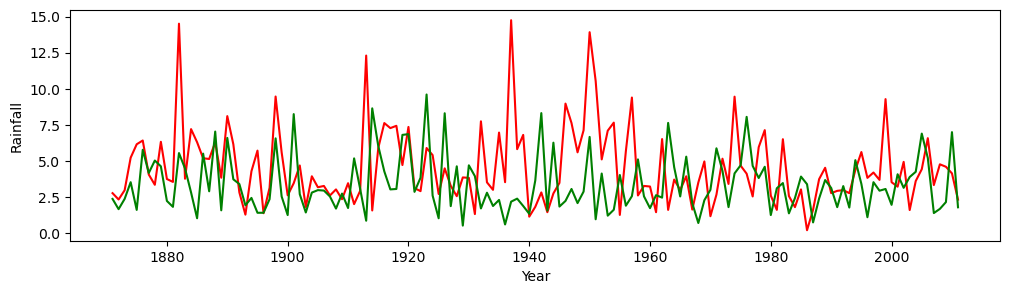

In [83]:
fig, axes = plt.subplots(figsize=(12,3)) 


axes.plot(x, rain["Jan"], 'r')
axes.plot(x, rain["Aug"], 'g')
axes.set_xlabel('Year')
axes.set_ylabel('Rainfall')

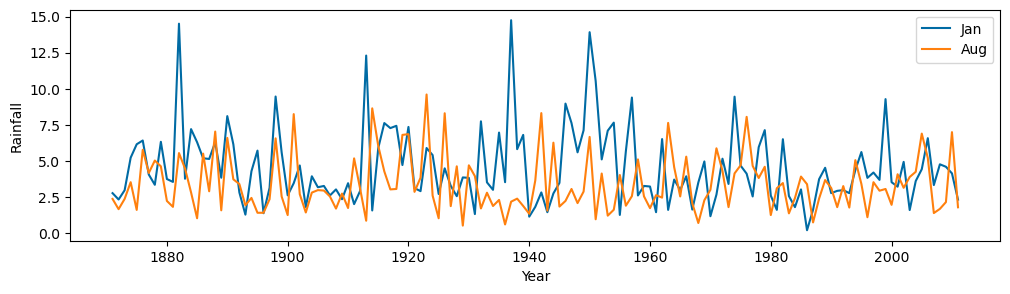

In [86]:
fig, ax = plt.subplots(figsize=(12,3))

ax.plot(x, rain['Jan'], label="Jan")
ax.plot(x, rain['Aug'], label="Aug")
ax.set_xlabel('Year')
ax.set_ylabel('Rainfall')
ax.legend(loc=1);